### 1. Введение

Для анализа мы будем использовать общедоступные данные с LendingClub.com. Lending Club объединяет людей, которым нужны деньги (заемщиков), с людьми, у которых есть деньги (инвесторы). 

Мы будем использовать данные о кредитовании за 2007-2010 годы. С помощью анализа данной информации мы попытаемся объяснить будет ли платить Заемщик или нет  - это в итоге должно помочь компаниям лучше распределять свои ресурсы.
Если у компаний будет профиль заемщика они смогут могут предложить заемщику стратегии выплат, которые помогут заемщику выплатить долг.

В ходе анализа мы собираемся определить соответствующие факторы, которые определяют, будет ли заемщик платить долг или нет, затем создадим профиль заемщика и, наконец, подумаем и дадим рекомендации по улучшению бизнеса.

#### 1.1 Цели
1. Найти соответствующие факторы, которые влияют на то, будет ли заемщик платить или нет.
2. Сделайте выводы и рекомендации по улучшению бизнес-операций.

In [1]:
# импорт  библиотек, необходимых для анализа 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Загружаем данные при помощи pandas

In [2]:
loan = pd.read_csv('loan_data.csv')

#### 1.2. Основые параметры



• credit.policy - 1, если клиент соответствует критериям кредитного андеррайтинга Lend-ingClub.com, и 0 в противном случае.

• цель - цель ссуды ( «кредитная карта», «консолидация долга», «образование», «крупная покупка», «малый бизнес» и «другое»).

• int.rate - процентная ставка по ссуде в виде доли (ставка 11% будет сохранена как 0,11). Заемщикам, которых LendingClub.com считает более рискованными, назначаются более высокие процентные ставки.

• installment - ежемесячные платежи.

• log.annual.inc - натуральный логарифм самооценки годового дохода заемщика.

• dti - отношение долга к доходу заемщика (сумма долга, деленная на годовой доход).

• fico - кредитный рейтинг FICO заемщика.

• days.with.cr.line - количество дней, в течение которых у заемщика была кредитная линия.

• revol.bal - возобновляемый баланс заемщика (сумма, не выплаченная в конце платежного цикла кредитной карты).

• revol.util - коэффициент использования возобновляемой линии заемщика (сумма использованной кредитной линии по отношению к общему доступному кредиту).

• inq.last.6mths - количество запросов от кредиторов по заемщику за последние 6 месяцев.

• delinq.2yrs - количество случаев просрочки платежа заемщиком на 30+ дней за последние 2 года.

• pub.rec - количество уничижительных публичных записей заемщика (заявления о банкротстве, налоговые залоги или судебные решения).

• not.fully.paid - не полностью оплаченный долг

In [3]:
loan.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
loan.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
# Посмотрим на типы переменных и количество данных
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Проверка распределения null-значений с помощью тепловой карты.

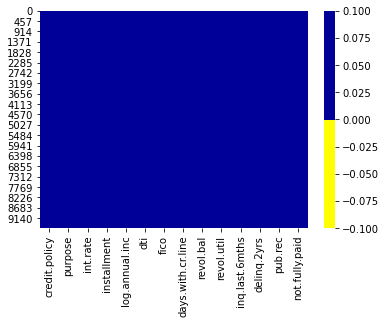

In [6]:
# желтый - пропущенные данные
colours = [ '#ffff00','#000099'] 
sns.heatmap(loan.isnull(), cmap=sns.color_palette(colours))
plt.show()

In [7]:
loan.isna().sum().sum()

0

null-значения отсутствуют

### 2. Описательный анализ данных

Посмотрим на какие цели выдавались кредиты

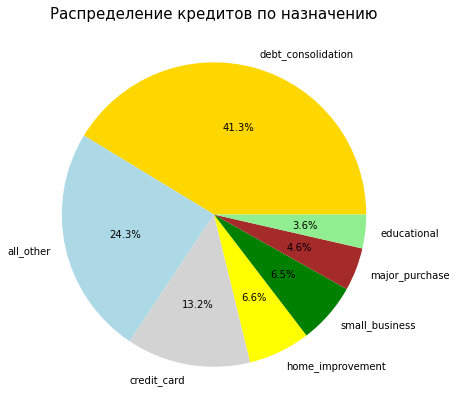

In [8]:
labels = loan.purpose.value_counts().index
colors = ['gold','lightblue','lightgrey','yellow','green','brown','lightgreen']
explode = [0,0,0,0,0,0,0]
sizes = loan.purpose.value_counts().values

plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Распределение кредитов по назначению',fontsize = 15)
plt.show()

In [9]:
cat = loan.select_dtypes('object').columns
table = pd.DataFrame(loan[cat[0]].value_counts())
table.rename(columns={'purpose':'count'}, inplace=True)
table['%'] = np.round((table['count']/table['count'].sum()) * 100, 2)
table

,count,%
debt_consolidation,3957,41.31
all_other,2331,24.34
credit_card,1262,13.18
home_improvement,629,6.57
small_business,619,6.46
major_purchase,437,4.56
educational,343,3.58


Построим матрицу парных корреляций для отобранных данных при помощи метода corr() pandas.
Визуализируем полученную матрицу при помощи seaborn heatmap.

In [10]:
# отберем колонки для анализа корреляции
research_list = ['int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid']

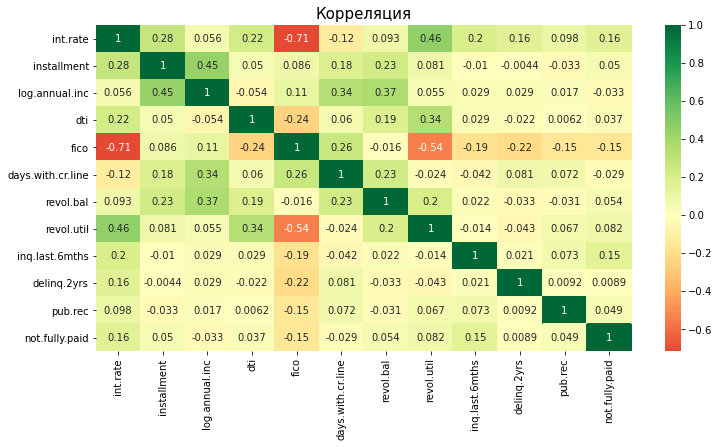

In [11]:
df_corr = loan[research_list]
df_corr = df_corr.corr()
plt.figure(figsize=(12,6))
sns.heatmap(df_corr, center=0, annot=True,cmap='RdYlGn')
plt.title('Корреляция',fontsize = 15)
plt.show()

Построим диаграммы рассеяния для каждой пары признаков со связями заметной значимости.

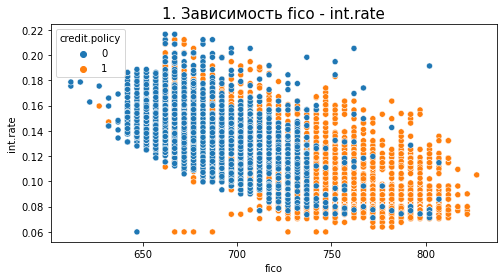

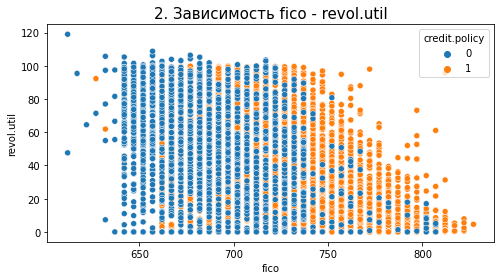

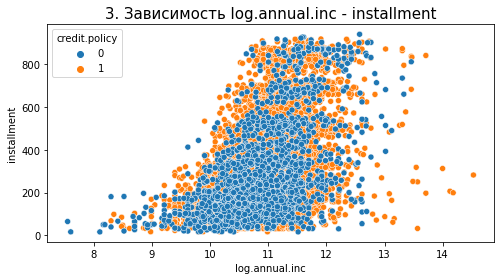

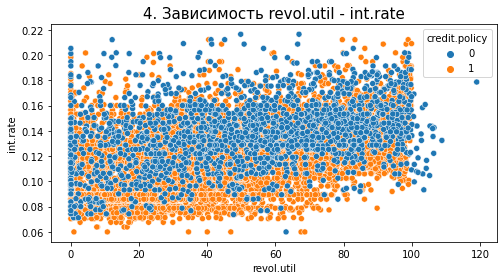

In [12]:

fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(data=loan, x='fico', y='int.rate', ax=ax, hue='credit.policy')
ax.set_title('1. Зависимоcть fico - int.rate',fontsize = 15)

fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(data=loan, x='fico', y='revol.util', ax=ax, hue='credit.policy')
ax.set_title('2. Зависимоcть fico - revol.util',fontsize = 15)

fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(data=loan, x='log.annual.inc', y='installment', ax=ax, hue='credit.policy')
ax.set_title('3. Зависимоcть log.annual.inc - installment',fontsize = 15)

fig, ax = plt.subplots(figsize=(8,4))
sns.scatterplot(data=loan, x='revol.util', y='int.rate', ax=ax, hue='credit.policy')
ax.set_title('4. Зависимоcть revol.util - int.rate',fontsize = 15)

plt.show()

Наблюдаем заметную обратную корреляционную зависимость между:
1. fico и int.rate - что логично - чем больше скорринговых  баллов у заемщика - тем меньше рисков для кридитора и ниже ставка 
2. fico и revol.util - можно сделать вывод что Заемщики с более низкой скорринговой оценкой более значительно загружены по лимитам кредитных линий - что повышает кредитные риски невыплат.

Наблюдаем заметную прямую корреляционную зависимость между: 

3. log.annual.inc - installment' - доходы заемщика и ежемесячный платеж по кредиту.
4. revol.util - int.rate -  при большей задолженности растет ставка по кредиту.

Рассмотрим проблемные кредиты отдельно

In [13]:
df_notfullypaid = loan[loan['delinq.2yrs'] != 0].groupby(['purpose']).count().sort_values('delinq.2yrs', ascending=False).reset_index()
df_notfullypaid.head()

,purpose,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,debt_consolidation,461,461,461,461,461,461,461,461,461,461,461,461,461
1,all_other,292,292,292,292,292,292,292,292,292,292,292,292,292
2,credit_card,135,135,135,135,135,135,135,135,135,135,135,135,135
3,small_business,73,73,73,73,73,73,73,73,73,73,73,73,73
4,home_improvement,66,66,66,66,66,66,66,66,66,66,66,66,66


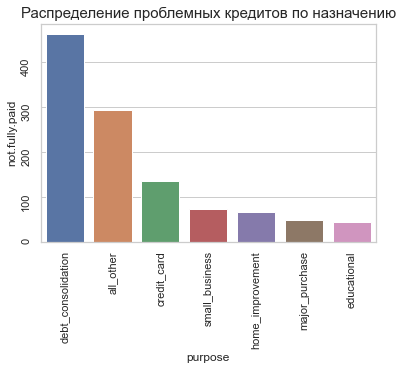

In [14]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(y='not.fully.paid', x='purpose', data=df_notfullypaid)
ax.tick_params(labelrotation=90)
ax.set_title('Распределение проблемных кредитов по назначению',fontsize = 15)
plt.show()

In [15]:
x = df_notfullypaid['credit.policy'].max()
np.round(((x / df_notfullypaid['credit.policy'].sum()) * 100),2)

41.16

Мы видим, что весомую долю проблемных кредитов(41.16%) составляют консолидированые(объединенные) кредиты.

Распределение проблемных кредитов по сроку использования

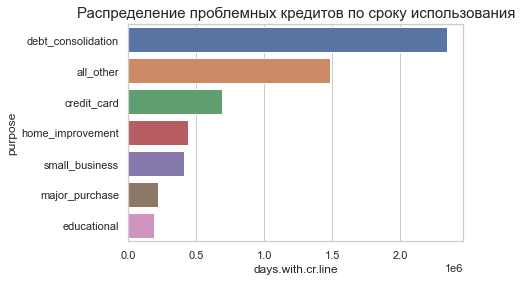

In [16]:
df_notfullypaid_term = loan[loan['delinq.2yrs'] != 0].groupby(['purpose']).sum().sort_values('days.with.cr.line', ascending=False).reset_index()
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x='days.with.cr.line', y='purpose', data=df_notfullypaid_term)
ax.tick_params(labelrotation=0)
ax.set_title('Распределение проблемных кредитов по сроку использования',fontsize = 15)
plt.show()

Распределение кредитов в зависимости от кредитного рейтинга FICO заемщика

In [17]:
df_notfullypaid = loan[loan['delinq.2yrs'] != 0]

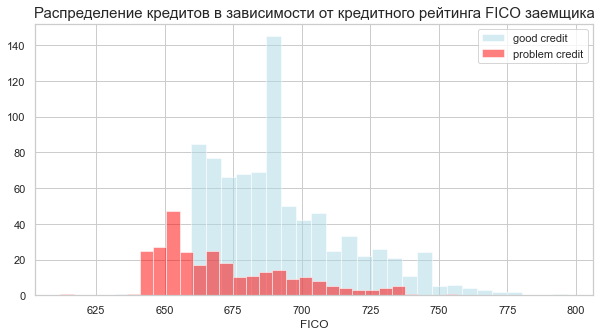

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
df_notfullypaid[df_notfullypaid['credit.policy']==1]['fico'].hist(alpha=0.5,color='lightblue',
                                              bins=30,label='good credit')
df_notfullypaid[df_notfullypaid['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='problem credit')
ax.set_title('Распределение кредитов в зависимости от кредитного рейтинга FICO заемщика',fontsize = 15)
plt.legend()
plt.xlabel('FICO')
plt.show()

Рассчитаем доли проблемных кредитов в зависимости от credit.policy

In [19]:
loan_bad = loan[loan['delinq.2yrs']!=0].groupby('credit.policy').count()
loan_bad['delinq.2yrs'].reset_index()
loan_good = loan[loan['delinq.2yrs']==0].groupby('credit.policy').count()
loan_good = loan_good['delinq.2yrs'].reset_index().rename(columns = {'delinq.2yrs' : 'good'}).set_index('credit.policy')
loan_good['bad'] = loan_bad['delinq.2yrs']
loan_good['percent_bad'] = np.round((loan_good['bad'] / (loan_good['bad'] + loan_good['good'])) * 100, 2)
loan_good


,good,bad,percent_bad
credit.policy,,,
0,1582,286,15.31
1,6876,834,10.82


Из расчетов можно сделать вывод:
доля проблемных кредитов портфеля клиентов, не соответствующих критериям кредитного андеррайтинга выше на 41.5%

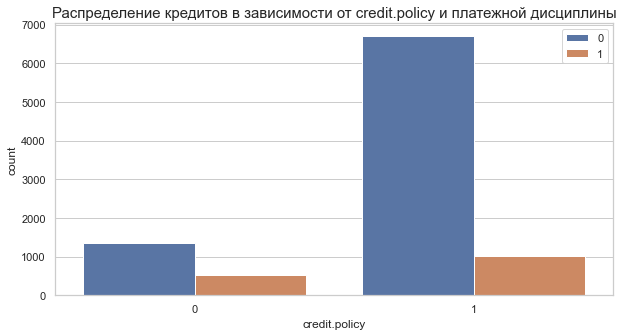

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='credit.policy', data=loan, hue='not.fully.paid', ax=ax)
ax.set_title('Распределение кредитов в зависимости от credit.policy и платежной дисциплины',fontsize = 15)
plt.legend()
plt.xlabel('credit.policy')
plt.show()

Рассчитаем доли проблемных кредитов в зависимости от цели кредита

In [21]:
loan_good = loan[loan['delinq.2yrs']==0]
cat_bad = loan_good.select_dtypes('object').columns
table1 = pd.DataFrame(loan_good[cat_bad[0]].value_counts())
table1.rename(columns={'purpose':'count'}, inplace=True)
table1['%_good'] = np.round((table1['count']/table1['count'].sum()) * 100, 2)

loan_bad = loan[loan['delinq.2yrs']!=0]
cat_bad = loan_bad.select_dtypes('object').columns
table = pd.DataFrame(loan_bad[cat_bad[0]].value_counts())
table.rename(columns={'purpose':'count'}, inplace=True)
table['%_bad '] = np.round((table['count']/table['count'].sum()) * 100, 2)
table['%_good'] = table1['%_good']
# table.reset_index()
table[['%_bad ', '%_good']]

,%_bad,%_good
debt_consolidation,41.16,41.33
all_other,26.07,24.11
credit_card,12.05,13.32
small_business,6.52,6.46
home_improvement,5.89,6.66
major_purchase,4.38,4.59
educational,3.93,3.54


 Доля кредитов выданных на прочие цели (26.07%) выше в плохом портфеле.
 
 В целом между "плохим" и "хорошим" кредитными портфелями в долях отличия незначительны.

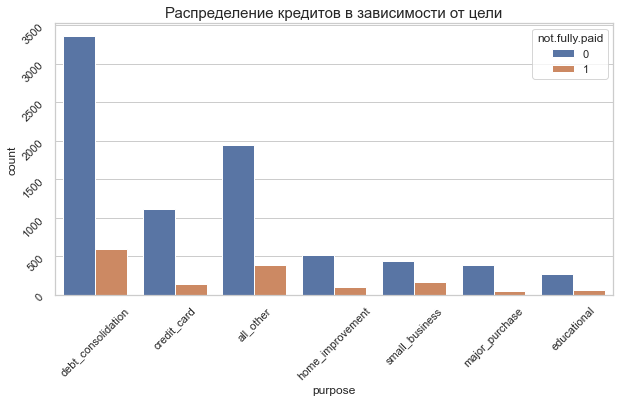

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='purpose',hue='not.fully.paid',data=loan)
plt.title('Распределение кредитов в зависимости от цели',fontsize = 15)
plt.tick_params(labelrotation=45)
plt.show()

In [23]:
# df1 - в течении 2 лет не имели проблем но сейчас не платят 
df1 = loan[(loan['delinq.2yrs']==0) & (loan['not.fully.paid']!=0)]

In [24]:
# df2 - в течении 2 лет были проблемы и сейчас не платят 
df2 = loan[(loan['delinq.2yrs']!=0) & (loan['not.fully.paid']!=0)]

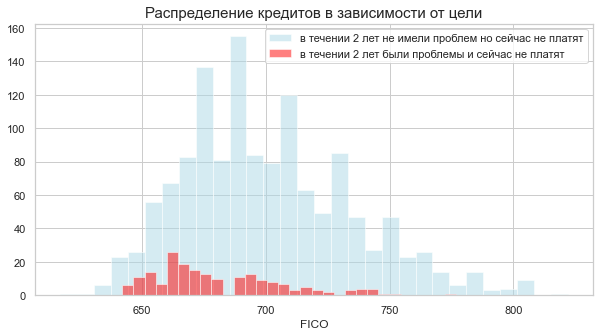

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
df1.fico.hist(alpha=0.5,color='lightblue',bins=30,label='в течении 2 лет не имели проблем но сейчас не платят')
df2.fico.hist(alpha=0.5,color='red', bins=30,label='в течении 2 лет были проблемы и сейчас не платят')
ax.set_title('Распределение кредитов в зависимости от цели',fontsize = 15)
plt.legend()
plt.xlabel('FICO')
plt.show()

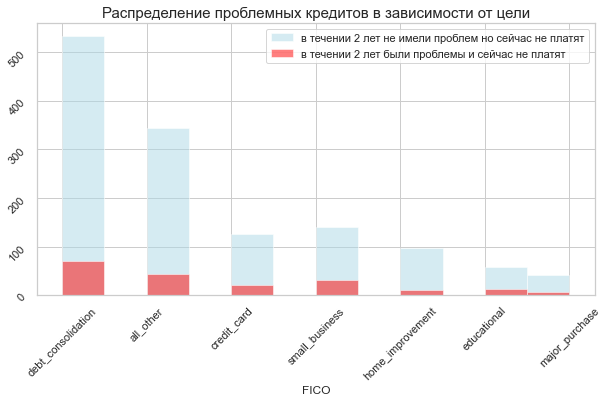

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
df1.purpose.hist(alpha=0.5,color='lightblue',bins=12,label='в течении 2 лет не имели проблем но сейчас не платят')
df2.purpose.hist(alpha=0.5,color='red', bins=12,label='в течении 2 лет были проблемы и сейчас не платят')
ax.set_title('Распределение проблемных кредитов в зависимости от цели',fontsize = 15)
plt.tick_params(labelrotation=45)
plt.legend()
plt.xlabel('FICO')
plt.show()

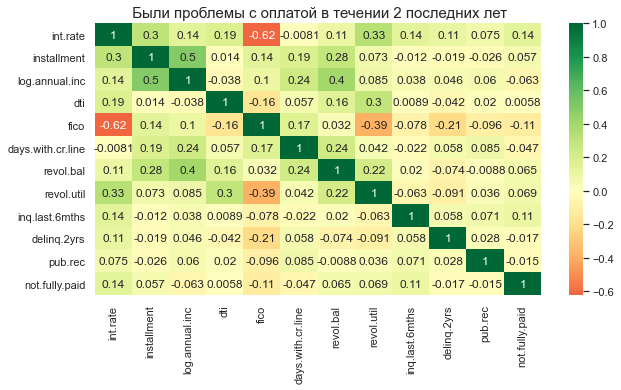

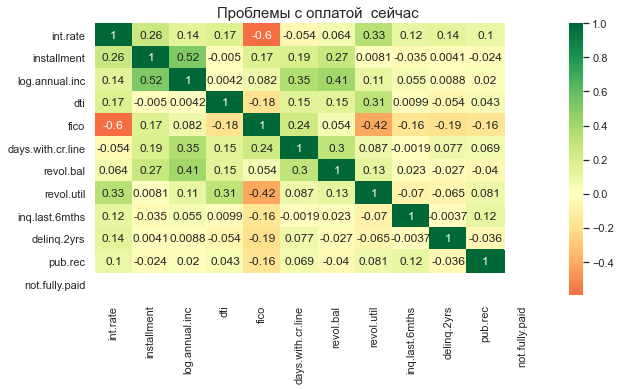

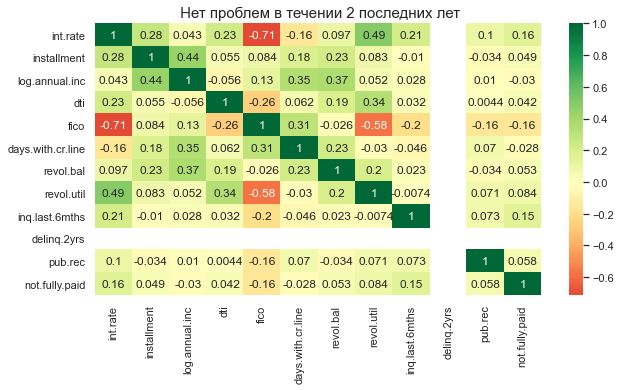

In [27]:
df3 = loan[loan['delinq.2yrs']!=0]
df3_corr = df3[research_list]
corr = df3_corr.corr()
plt.figure(figsize=(10,5))
plt.title(' Были проблемы с оплатой в течении 2 последних лет',fontsize = 15)
sns.heatmap(corr, center=0, annot=True,cmap='RdYlGn')

df4 = loan[loan['not.fully.paid']!=0]
df4_corr = df4[research_list]
corr = df4_corr.corr()
plt.figure(figsize=(10,5))
plt.title('Проблемы с оплатой  сейчас',fontsize = 15)
sns.heatmap(corr, center=0, annot=True,cmap='RdYlGn')

df5 = loan[loan['delinq.2yrs']==0]
df5_corr = df5[research_list]
corr = df5_corr.corr()
plt.figure(figsize=(10,5))
plt.title(' Нет проблем в течении 2 последних лет',fontsize = 15)
sns.heatmap(corr, center=0, annot=True,cmap='RdYlGn')

plt.show()

Можно сделать вывод, что корреляция основных параметров по данным 3-м группам заемщиков подчинется одной закономерности т.к. отличия незначительны.

Отберем заемщиков  у которых были проблемы с оплатой в тетчении 2 последних лет и в т.ч. текущий момент:

In [28]:
loan[(loan['delinq.2yrs']!=0) & (loan['not.fully.paid']!=0)].groupby('not.fully.paid').count()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
not.fully.paid,,,,,,,,,,,,,
1,196,196,196,196,196,196,196,196,196,196,196,196,196


In [29]:
loan[(loan['delinq.2yrs']!=0) & (loan['not.fully.paid']==0)].groupby('not.fully.paid').count()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
not.fully.paid,,,,,,,,,,,,,
0,924,924,924,924,924,924,924,924,924,924,924,924,924


Доля просрочки в у заемщиков с проблемами по оплате в теч. 2 последних лет  составлет 17,5%, что явлется довольно высоким показателем:

In [30]:
(196 / (196 + 924)) * 100

17.5

In [31]:
loan[loan['not.fully.paid']!=0].groupby('not.fully.paid').count()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
not.fully.paid,,,,,,,,,,,,,
1,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533,1533


Доля просроченных кредитов в общем кредитном портфеле составляет 16%, что является довольно высоким показателем:

In [32]:
round(((1533 / 9578) * 100),3)

16.005

Т.о. процент просроченных кредитов в выше на 9.3% у заемщиков с проблемами по оплате в теч. 2 последних лет:

In [33]:
(17.5 / 16) * 100 - 100

9.375

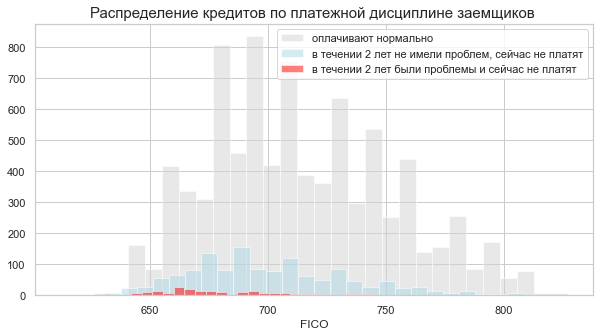

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
df5.fico.hist(alpha=0.5,color='lightgrey', bins=30,label='оплачивают нормально')
df1.fico.hist(alpha=0.5,color='lightblue',bins=30,label='в течении 2 лет не имели проблем, сейчас не платят')
df2.fico.hist(alpha=0.5,color='red', bins=30,label='в течении 2 лет были проблемы и сейчас не платят')

ax.set_title('Распределение кредитов по платежной дисциплине заемщиков ',fontsize = 15)
plt.legend()
plt.xlabel('FICO')
plt.show()

Из графика мы видим, что основная доля постоянных проблемных заемщиков находится в диапазоне между значением 660 - 700 баллов FICO. В этой связи кредитоной организации рекомендуется доработка кредитной политики по отнощению к данному сегменту клиентов для снижения уровня просроченной задолженности.

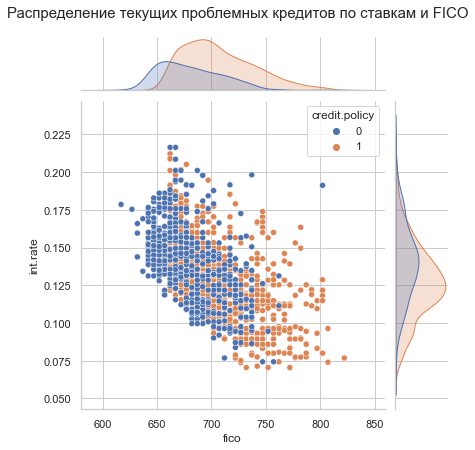

In [35]:
sns.jointplot(x='fico',y='int.rate',data=df4,hue='credit.policy',ax=ax)
plt.title('Распределение текущих проблемных кредитов по ставкам и FICO',fontsize = 15,y = 1.25, x = -3)
plt.show()

Мы видим, что основная доля проблемных кредитов сосредоточена 650-ми и 750-ми баллaми  FICO и ставке кредита 0.100 и 0.150.
Для улучшения показателей качества кредитного портфеля можно рекоммендовать кредитной организации пересмотреть кредитную политику по отношению к данным заемщикам.

Варианты:  

а) Ужесточение - что бы избежать появления проблемного заёмщика.

б) Смягчение в части ставки - чтобы долговая нагрузка была приемлемой для заемщика.

в) Проведение реструктуризации задолженности данных заемщиков.

### 3. Выводы и рекомендации

По итогу анализа предоставленных данных явных зависимостей между разными группами заемщиков выявлено не было.
Однако, тем не менее, можно сделать ряд рекомендаций для кредитной организации с целью улучшения качества кредитного портфеля:


Из анализа дата-сета можно сделать вывод: 

1.	Доля просроченных кредитов в общем  кредитном портфеле составляет 16%, что является довольно высоким показателем

2.	Доля проблемных кредитов портфеля клиентов, не соответствующих критериям кредитного андеррайтинга выше на 41.5%

3.	Весомую долю проблемных кредитов(41.16%) составляют консолидированные(объединенные) кредиты.

4.	Основная доля проблемных кредитов сосредоточена 650-ми и 750-ми баллами  FICO. 

5.	Заемщики с более низкой скорринговой оценкой более значительно загружены по лимитам -  это повышает кредитные риски невыплат.

В этой связи кредитной организации рекомендуется доработка кредитной политики по отношению к данному сегменту клиентов для снижения уровня просроченной задолженности.

Рекомендуемые варианты кредитной политики:  

а) К сегменту заемщиков с баллами  FICO в диапазоне (650 - 750 баллов) рекомендуется  снижение % одобрения, а так же  лимитов - эти меры снизят вероятность появления новых проблемных кредитов.

б) Смягчение в части ставки - чтобы долговая нагрузка была приемлемой для заемщика.

в) Проведение более граммотной реструктуризации(консолидации) задолженности.
